In [58]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import warnings

from scipy.stats import f
from scipy.stats import t

warnings.filterwarnings('ignore')

In [38]:
def bmi_hist(data, hist_label):
    plt.hist(data, bins=30, alpha=.5, color='black', label=hist_label)
    plt.legend(loc='upper right')
    plt.xlabel(hist_label)
    plt.ylabel('count')
    plt.show()

In [53]:
def coef_b0b1(value1, value2):
    k1 = 1
    a = .05
    b1 = (np.mean(value1 * value2) - np.mean(value1) * np.mean(value2)) / (np.mean(value1 ** 2) - np.mean(value1) ** 2)
    b0 = np.mean(value2) - b1 * np.mean(value1)
    scoring_pred = b0 + b1 * value1
    cov = value1.cov(value2)
    R1 = scoring_pred.var() / value2.var()
    k2 = scoring_pred.shape[0] - k1 - 1
    T = (R1 / (1 - R1)) * (k2 / k1)
    F_crit = f.ppf(1 - a, k1, k2)
    print(f'b1 = {b1}')
    print(f'b0 = {b0}')
    print(f'R1 = {R1}')
    print(f'cov = {cov}')
    print(f'F-критерий Фишера: {T}')
    print(f'F_crit = {F_crit}')
    if T > F_crit:
        print('Уравнение регрессии статистически значимое')
    plt.scatter(value1, value2)
    plt.plot(value1, b0 + b1 * value1, color='red')

In [60]:
def t_statistic(value1, value2):
    r = value1.corr(value2)
    df = value1.count() - 2
    return r * np.sqrt(df / 1 - r ** 2)

def test(value1, value2):
    t_value = t_statistic(value1, value2)
    df = value1.count() - 2 
    p = 2 * t.sf(t_value, df)
    print(f't-значение = {t_value}')
    print(f'p-значение = {p}')

In [2]:
matplotlib.rcParams.update({'font.size': 14})
%matplotlib inline
%config InlineBackend.figure_format = 'svg'

In [3]:
df = pd.read_csv('brain_stroke.csv')

In [4]:
df.head(5)

,gender,age,hypertension,heart_disease,ever_married,work_type,residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,3.0,0,0,No,children,Rural,95.12,18.0,Unknown,0
1,Female,8.0,0,0,No,Private,Urban,110.89,17.6,Unknown,0
2,Female,70.0,0,0,Yes,Private,Rural,69.04,35.9,formerly smoked,0
3,Female,52.0,0,0,Yes,Private,Urban,77.59,17.7,formerly smoked,0
4,Female,32.0,0,0,Yes,Private,Rural,77.67,32.3,smokes,0


Итак, данный датасет представляет собой информацию о пациентах, перенесших инсульт и о пациентах с похожей симптоматикой, но без инсульта. В датасете имеетются признаки, которые так или иначе могут быть связаны с причинами возникновения инсульта:
* **gender** - пол;
* **age** - возраст;
* **hypertension** - страдает ли человек гипертонией;
* **heart_disease** - страдает ли человек сердечными заболеваниями;
* **ever_married** - состоял ли в браке;
* **work_type** - вид трудоустройства;
* **residence_type** - где проживает;
* **avg_glucose_level** - средний уровень сахара в крови;
* **bmi** - индекс массы тела;
* **smoking_status** - отношение к курению;
* **stroke** - (целевая переменная) показывает был ли инсульт (0 - нет; 1 - да);

Данный датасет является достаточно точной выборкой, без каких-либо пропусков, неточностей и выбросов, поэтому не требует никаких подготвительных операций для дальнейшего анализа.<br>Единственное, заменим значения **"Unknown"** признака **"smoking_status"**, на значение **"never smoked"**. Далее проведем бинарную замену строковых признаков **'gender'**, **'ever_married'**, **'residence_type'** и **'smoking_status'** к числовым и добавим новые признаки **'gender_int'**, **'ever_married_int'**, **'residence_type_int'** и **'smoking_status_int'** соответственно.

In [5]:
df.loc[(df['smoking_status'] == 'Unknown'), 'smoking_status'] = 'never smoked'

In [6]:
df.insert(1, 'gender_int', df['gender'].replace({'Male':0, 'Female':1}))
df.insert(6, 'ever_married_int', df['ever_married'].replace({'No':0, 'Yes':1}))
df.insert(9, 'residence_type_int', df['residence_type'].replace({'Rural':0, 'Urban':1}))
df.insert(13, 'smoking_status_int', df['smoking_status'].replace({'never smoked':0, 'formerly smoked':1, 'smokes':1}))

In [7]:
df.head(5)

,gender,gender_int,age,hypertension,heart_disease,ever_married,ever_married_int,work_type,residence_type,residence_type_int,avg_glucose_level,bmi,smoking_status,smoking_status_int,stroke
0,Male,0,3.0,0,0,No,0,children,Rural,0,95.12,18.0,never smoked,0,0
1,Female,1,8.0,0,0,No,0,Private,Urban,1,110.89,17.6,never smoked,0,0
2,Female,1,70.0,0,0,Yes,1,Private,Rural,0,69.04,35.9,formerly smoked,1,0
3,Female,1,52.0,0,0,Yes,1,Private,Urban,1,77.59,17.7,formerly smoked,1,0
4,Female,1,32.0,0,0,Yes,1,Private,Rural,0,77.67,32.3,smokes,1,0


In [8]:
df.describe()

,gender_int,age,hypertension,heart_disease,ever_married_int,residence_type_int,avg_glucose_level,bmi,smoking_status_int,stroke
count,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000,4981.000000
mean,0.583618,43.419859,0.096165,0.055210,0.658502,0.508332,105.943562,28.498173,0.329853,0.461955
std,0.493008,22.662755,0.294848,0.228412,0.474260,0.499981,45.075373,6.790464,0.470207,0.498601
min,0.000000,0.080000,0.000000,0.000000,0.000000,0.000000,55.120000,14.000000,0.000000,0.000000
25%,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,77.230000,23.700000,0.000000,0.000000
50%,1.000000,45.000000,0.000000,0.000000,1.000000,1.000000,91.850000,28.100000,0.000000,0.000000
75%,1.000000,61.000000,0.000000,0.000000,1.000000,1.000000,113.860000,32.600000,1.000000,1.000000
max,1.000000,82.000000,1.000000,1.000000,1.000000,1.000000,271.740000,48.900000,1.000000,1.000000


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4981 entries, 0 to 4980
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   gender              4981 non-null   object 
 1   gender_int          4981 non-null   int64  
 2   age                 4981 non-null   float64
 3   hypertension        4981 non-null   int64  
 4   heart_disease       4981 non-null   int64  
 5   ever_married        4981 non-null   object 
 6   ever_married_int    4981 non-null   int64  
 7   work_type           4981 non-null   object 
 8   residence_type      4981 non-null   object 
 9   residence_type_int  4981 non-null   int64  
 10  avg_glucose_level   4981 non-null   float64
 11  bmi                 4981 non-null   float64
 12  smoking_status      4981 non-null   object 
 13  smoking_status_int  4981 non-null   int64  
 14  stroke              4981 non-null   int64  
dtypes: float64(3), int64(7), object(5)
memory usage: 583.8+

Проанализируем влияние признаков друг на друга, для этого построим матрицу корреляции. Для большей наглядности разделим датасет на два датасета (данные по женщинам и мужчинам). Корреляции меньше 0.2 отображать не будем для наглядности.

In [14]:
df_male = df.loc[df['gender'] == 'Male'].drop(columns={'gender', 'gender_int'})
df_female = df.loc[df['gender'] == 'Female'].drop(columns={'gender', 'gender_int'})

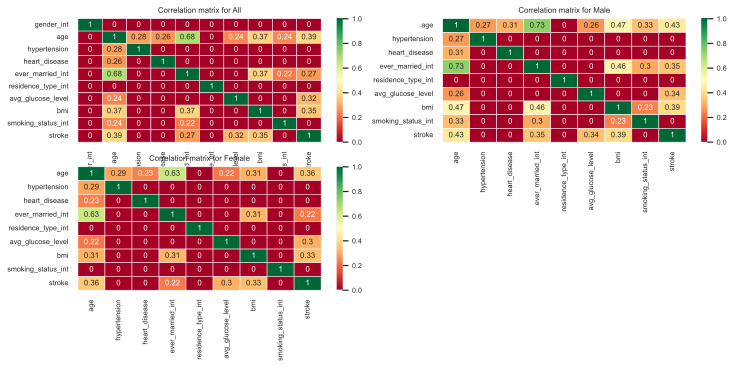

In [25]:
plt.figure(figsize = (12,5))
plt.subplots_adjust(wspace=.2)

plt.subplot (221)
sns.set(font_scale=.65)
df_corr = df.corr()
df_corr[np.abs(df_corr) < 0.2] = 0
sns.heatmap(df_corr, annot=True, linewidths=.5, cmap='RdYlGn')
plt.title('Correlation matrix for All')

plt.subplot (222)
sns.set(font_scale=.65)
df_male_corr = df_male.corr()
df_male_corr[np.abs(df_male_corr) < 0.2] = 0
sns.heatmap(df_male_corr, annot=True, linewidths=.5, cmap='RdYlGn')
plt.title('Correlation matrix for Male')

plt.subplot (223)
sns.set(font_scale=.65)
df_female_corr = df_female.corr()
df_female_corr[np.abs(df_female_corr) < 0.2] = 0
sns.heatmap(df_female_corr, annot=True, linewidths=.5, cmap='RdYlGn')
plt.title('Correlation matrix for Female')

plt.show()

Данные графики показывают, какие признаки оказывают наибольшее влияние на целевую переменную **'stroke'**:
* **age** - возраст;
* **avg_glucose_level** - средний уровень сахара в крови;
* **bmi** - индекс массы тела;
* И что для многих будет сюрпризом:
<br>**ever_married** - состоял ли в браке.
<br>Причем видно, что у мужчин и женщин статистика совершенно разная (мужчины больше подвержены инсульту).

Выдвинем несколько простых гипотез и проверим их:
<br>A) у мужчин инсульт чаще, чем у женщин;
<br>B) у курящих инсульт чаще, чем у некурящих;
<br>C) у людей старше 55 лет инсульт случается чаще;
<br>D) у людей с уровнем сахара выше 130 инсульт случается чаще;
<br>E) у людей с индексом массы тела выше 25 инсульт случается чаще.
<br>Гипотезы C,D,E будем проверять на 3 выборках: общей, выборке по женщинам, выборке по мужчинам.

In [26]:
hyp_A = df.loc[(df['gender_int'] == 0) & (df['stroke'] == 1)].shape[0] > df.loc[(df['gender_int'] == 1) & (df['stroke'] == 1)].shape[0]
hyp_A

False

Гипотеза A оказалось ложной, однако это может возникать из-за того, что используемый датасет является очень ограниченной выборкой, в которую женщин могло попасть больше. Для дальнейшей проверки нашей гипотезы возьмем по 2000 записей из разделенных датасетов **'df_male'** и **'df_female'**.

In [27]:
df_male_sample = df_male.sample(n=2000)
df_female_sample = df_female.sample(n=2000)

In [28]:
hyp_A = df_male_sample.loc[(df_male_sample['stroke'] == 1)].shape[0] > df_female_sample.loc[(df_female_sample['stroke'] == 1)].shape[0]
print(f'Гипотеза A: {hyp_A}')

Гипотеза A: True


Очевидно, что при равенстве выборок гипотеза A все-таки оказывается верной.

In [29]:
hyp_B = df.loc[(df['smoking_status_int'] == 1) & (df['stroke'] == 1)].shape[0] > df.loc[(df['smoking_status_int'] == 0) & (df['stroke'] == 1)].shape[0]
print(f'Гипотеза B: {hyp_B}')

Гипотеза B: False


Гипотеза B оказалась ложной, однако здесь похожая ситуация как и в случае с гипотезой A, в выборку могло попасть больше некурящих людей. Для дальнейшей проверки нашей гипотезы возьмем по 700 случайных записей курящих и не курящих людей.

In [30]:
df_smoke_sample = df.loc[(df['smoking_status_int'] == 1) ].sample(n=700)
df_nosmoke_sample = df.loc[(df['smoking_status_int'] == 0) ].sample(n=700)

In [31]:
hyp_B = df_smoke_sample.loc[(df_smoke_sample['stroke'] == 1)].shape[0] > df_nosmoke_sample.loc[(df_nosmoke_sample['stroke'] == 1)].shape[0]
print(f'Гипотеза B: {hyp_B}')

Гипотеза B: True


Очевидно, что при равенстве выборок гипотеза B тоже оказывается верной. Для проверки остальных гипотез будем брать равные по количеству выборки.

In [32]:
df_age_less55_sample = df.loc[(df['age'] < 55) ].sample(n=1750)
df_age_more55_sample = df.loc[(df['age'] >= 55) ].sample(n=1750)
df_male_age_less55_sample = df.loc[(df['gender_int'] == 0) & (df['age'] < 55) ].sample(n=750)
df_female_age_less55_sample = df.loc[(df['gender_int'] == 1) & (df['age'] < 55) ].sample(n=950)
df_male_age_more55_sample = df.loc[(df['gender_int'] == 0) & (df['age'] >= 55) ].sample(n=750)
df_female_age_more55_sample = df.loc[(df['gender_int'] == 1) & (df['age'] >= 55) ].sample(n=950)

In [33]:
hyp_C_all = df_age_more55_sample.loc[(df_age_more55_sample['stroke'] == 1)].shape[0] > df_age_less55_sample.loc[(df_age_less55_sample['stroke'] == 1)].shape[0]
hyp_C_male = df_male_age_more55_sample.loc[(df_male_age_more55_sample['stroke'] == 1)].shape[0] > df_male_age_less55_sample.loc[(df_male_age_less55_sample['stroke'] == 1)].shape[0]
hyp_C_female = df_female_age_more55_sample.loc[(df_female_age_more55_sample['stroke'] == 1)].shape[0] > df_female_age_less55_sample.loc[(df_female_age_less55_sample['stroke'] == 1)].shape[0]
print(f'Гипотеза C (общая): {hyp_C_all}')
print(f'Гипотеза C (мужчины): {hyp_C_male}')
print(f'Гипотеза C (женщины): {hyp_C_female}')

Гипотеза C (общая): True
Гипотеза C (мужчины): True
Гипотеза C (женщины): True


Гипотеза C оказалась верной на всех выборках.

In [34]:
df_glucose_less130_sample = df.loc[(df['avg_glucose_level'] < 130) ].sample(n=850)
df_glucose_more130_sample = df.loc[(df['avg_glucose_level'] >= 130) ].sample(n=850)
df_male_glucose_less130_sample = df.loc[(df['gender_int'] == 0) & (df['avg_glucose_level'] < 130) ].sample(n=400)
df_female_glucose_less130_sample = df.loc[(df['gender_int'] == 1) & (df['avg_glucose_level'] < 130) ].sample(n=450)
df_male_glucose_more130_sample = df.loc[(df['gender_int'] == 0) & (df['avg_glucose_level'] >= 130) ].sample(n=400)
df_female_glucose_more130_sample = df.loc[(df['gender_int'] == 1) & (df['avg_glucose_level'] >= 130) ].sample(n=450)

In [35]:
hyp_D_all = df_glucose_more130_sample.loc[(df_glucose_more130_sample['stroke'] == 1)].shape[0] > df_glucose_less130_sample.loc[(df_glucose_less130_sample['stroke'] == 1)].shape[0]
hyp_D_male = df_male_glucose_more130_sample.loc[(df_male_glucose_more130_sample['stroke'] == 1)].shape[0] > df_male_glucose_less130_sample.loc[(df_male_glucose_less130_sample['stroke'] == 1)].shape[0]
hyp_D_female = df_female_glucose_more130_sample.loc[(df_female_glucose_more130_sample['stroke'] == 1)].shape[0] > df_female_glucose_less130_sample.loc[(df_female_glucose_less130_sample['stroke'] == 1)].shape[0]
print(f'Гипотеза D (общая): {hyp_D_all}')
print(f'Гипотеза D (мужчины): {hyp_D_male}')
print(f'Гипотеза D (женщины): {hyp_D_female}')

Гипотеза D (общая): True
Гипотеза D (мужчины): True
Гипотеза D (женщины): True


Гипотеза D оказалась верной на всех выборках.

In [36]:
df_bmi_less25_sample = df.loc[(df['bmi'] < 25) ].sample(n=1500)
df_bmi_more25_sample = df.loc[(df['bmi'] >= 25) ].sample(n=1500)
df_male_bmi_less25_sample = df.loc[(df['gender_int'] == 0) & (df['bmi'] < 25) ].sample(n=550)
df_female_bmi_less25_sample = df.loc[(df['gender_int'] == 1) & (df['bmi'] < 25) ].sample(n=950)
df_male_bmi_more25_sample = df.loc[(df['gender_int'] == 0) & (df['bmi'] >= 25) ].sample(n=550)
df_female_bmi_more25_sample = df.loc[(df['gender_int'] == 1) & (df['bmi'] >= 25) ].sample(n=950)

In [37]:
hyp_E_all = df_bmi_more25_sample.loc[(df_bmi_more25_sample['stroke'] == 1)].shape[0] > df_bmi_less25_sample.loc[(df_bmi_less25_sample['stroke'] == 1)].shape[0]
hyp_E_male = df_male_bmi_more25_sample.loc[(df_male_bmi_more25_sample['stroke'] == 1)].shape[0] > df_male_bmi_less25_sample.loc[(df_male_bmi_less25_sample['stroke'] == 1)].shape[0]
hyp_E_female = df_female_bmi_more25_sample.loc[(df_female_bmi_more25_sample['stroke'] == 1)].shape[0] > df_female_bmi_less25_sample.loc[(df_female_bmi_less25_sample['stroke'] == 1)].shape[0]
print(f'Гипотеза E (общая): {hyp_E_all}')
print(f'Гипотеза E (мужчины): {hyp_E_male}')
print(f'Гипотеза E (женщины): {hyp_E_female}')

Гипотеза E (общая): True
Гипотеза E (мужчины): True
Гипотеза E (женщины): True


Гипотеза E оказалась верной на всех выборках.

Из построенной ранее матрицы корреляции признаков видно, что прослеживается высокая связь между возрастом **'age'** и индексом массы тела **'bmi'**, попробуем построить график линейной регрессии, найдя коэффициенты b0, b1.
<br>Для начала посмотрим на распределение индекса массы тела и убедимся, что оно распределено нормально и является унимодальным, а также найдем коэффициент корреляции.

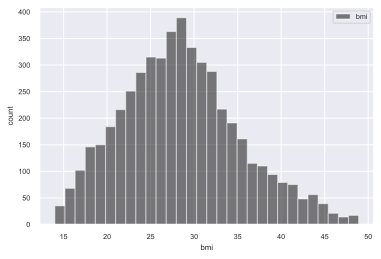

In [40]:
bmi_hist(df['bmi'], 'bmi')

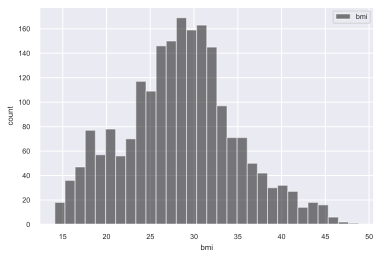

In [41]:
bmi_hist(df_male['bmi'], 'bmi')

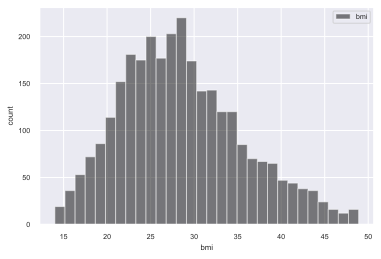

In [42]:
bmi_hist(df_female['bmi'], 'bmi')

Видно, что распределение индекса массы тела по всем выборкам (общая, мужчины и женщины) является унимодальным.
<br>Посмотрим на коэффициенты корреляции.

In [43]:
print(f'Коэффициент корреляции (общий): {df.corr().iloc[1,-3]}')
print(f'Коэффициент корреляции (мужчины): {df_male.corr().iloc[0,-3]}')
print(f'Коэффициент корреляции (женщины): {df_female.corr().iloc[0,-3]}')

Коэффициент корреляции (общий): 0.3737030988892545
Коэффициент корреляции (мужчины): 0.4704024291157524
Коэффициент корреляции (женщины): 0.3073084090969318


Видно, что на мужской выборке коэффициент корреляции количественно выражает сильную, положительную корреляцию, предсказать индекс массы тела у мужчин с возрастом можно точнее, чем у женщин.

b1 = 0.11197302763004746
b0 = 23.636319933943
R1 = 0.13965400611941942
cov = 57.50939934159447
F-критерий Фишера: 808.2065836469797
F_crit = 3.843327164883543
Уравнение регрессии статистически значимое


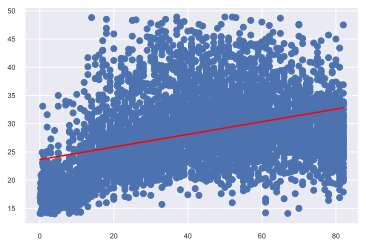

In [54]:
coef_b0b1(df['age'], df['bmi'])

b1 = 0.1326099190907039
b0 = 22.621946651235255
R1 = 0.23646301817277152
F-критерий Фишера: 309.07486834714354
F_crit = 3.850793370783879
Уравнение регрессии статистически значимое


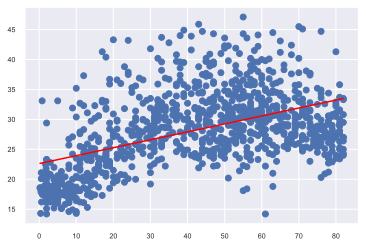

In [52]:
coef_b0b1(df_male['age'].sample(n=1000, random_state = 42), df_male['bmi'].sample(n=1000, random_state = 42))

b1 = 0.09794007868364943
b0 = 24.265232941810297
R1 = 0.09443845830170171
F-критерий Фишера: 302.95425405537515
F_crit = 3.84466187782213
Уравнение регрессии статистически значимое


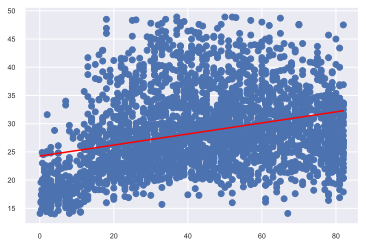

In [46]:
coef_b0b1(df_female['age'], df_female['bmi'])

Выдвинем статистическую гипотезу о том, что на самом деле между возрастом и индексом массы тела отсутствует какая-либо взаимосвязь, т.е. коэфициент корреляции стремится к нулю.
<br>Для проверки нашей гипотезы воспользуемся t-распределением и вычислим t-статистику.

In [62]:
test(df['age'], df['bmi'])

t-значение = 26.368879256184105
p-значение = 1.499233832154411e-143


In [63]:
test(df_male['age'], df_male['bmi'])

t-значение = 21.411211421788718
p-значение = 4.812748972444769e-92


In [64]:
test(df_female['age'], df_female['bmi'])

t-значение = 16.563055356545604
p-значение = 5.985899751397299e-59


p-значение настолько мало, что в сущности равно 0, означая, что шанс, что нулевая гипотеза является истинной, фактически не существует.
<br>Мы вынуждены принять альтернативную гипотезу о существовании корреляции.